##<div align="center"><b>Вычисление года-начала периода устойчивого роста температуры на всей территории земного шара</b></div>
Используем базу данных HadCRUT.4.6.0.0 Метеорологического центра Хэдли (Великобритания) со среднемесячными значениями приземной температуры воздуха на равномерной сетке географических координат ($5^{\circ}\times 5^{\circ}$)

**Импорт необходимых модулей:**

In [ ]:
!pip install rioxarray
!pip install cartopy
!pip install geopandas
!pip install kats
!pip install global-land-mask
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr # for manipulating & reading gridded data, 
# and – very important – operate out-of-memory thanks to its dask capabilities
import rioxarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
import geopandas as gpd # to open shapefiles
from global_land_mask import globe
import seaborn as sns
# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

     |████████████████████████████████| 45 kB 2.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 6.6 MB 53.8 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.6.1-py3-none-any.whl size=53246 sha256=e6a0b16f9ca7b40c748ce98844f55e83c7a666645f3a7dcb91d69e398a918588
  Stored in directory: /root/.cache/pip/wheels/a8/30/1c/78957e628ce5cc7f7109627c13624881a82efac11d28e96fef
Successfully built rioxarray
     |████████████████████████████████| 12.1 MB 157 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 55.0 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516241 sha256=28e341d1536834b9a78f20b032cc2a7146674b2f9e9d327320b2b7c3e482

**Подключение Google диска к файловой системе ноутбука Colaboratory:**

In [ ]:
from google.colab import drive
# Связываем google диск c google colab:
drive.mount('/content/drive', force_remount=True)
print('All changes made in this colab session should now be visible in Drive.')

Mounted at /content/drive
All changes made in this colab session should now be visible in Drive.


**Загрузка файлов с компьютера в файловую систему ноутбука Colaboratory:**

In [ ]:
from google.colab import files
data_folder_abs_path = '/content/drive/MyDrive/Colab Notebooks/HadCRUT'
os.makedirs(data_folder_abs_path, exist_ok=True)
os.chdir(data_folder_abs_path)

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
%ls -a '/content/drive/MyDrive/Colab Notebooks/HadCRUT'

CRUTEM.4.6.0.0.anomalies.nc   ne_10m_admin_0_countries.README.html
HadCRUT.4.6.0.0.median.nc     ne_10m_admin_0_countries.shp
ne_10m_admin_0_countries.cpg  ne_10m_admin_0_countries.shx
ne_10m_admin_0_countries.dbf  ne_10m_admin_0_countries.VERSION.txt
ne_10m_admin_0_countries.prj


In [ ]:
# Load the shapefile
PATH_TO_SHAPEFILE = 'ne_10m_admin_0_countries.shp'
boundaries = gpd.read_file(PATH_TO_SHAPEFILE)
boundaries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,...,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,260580739,17,3028000.0,2017,2010,...,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,None,Malay.,MY,Malaysia,None,Malaysia,None,None,Malaysia,None,2,4,3,6,31381992,15,863000.0,2017,2010,...,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,None,Chile,CL,Republic of Chile,None,Chile,None,None,Chile,None,5,1,5,9,17789267,14,436100.0,2017,2002,...,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,None,Bolivia,BO,Plurinational State of Bolivia,None,Bolivia,None,None,Bolivia,None,1,5,2,3,11138234,14,78350.0,2017,2001,...,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,None,Peru,PE,Republic of Peru,None,Peru,None,None,Peru,None,4,4,4,11,31036656,15,410400.0,2017,2007,...,PER,PER,-99,-99,South America,Americas,South America,Latin America & Caribbean,4,4,4,-99,1,0.0,2.0,7.0,1159321163,Q419,بيرو,পেরু,Peru,Peru,Perú,Pérou,Περού,पेरू,Peru,Peru,Perù,ペルー,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [ ]:
# Read NetCDF
PATH_TO_NETCDF = 'HadCRUT.4.6.0.0.median.nc'
# Open the data using a context manager
with xr.open_dataset(PATH_TO_NETCDF) as file_nc:   
    temp_xr = file_nc
ds = temp_xr["temperature_anomaly"]

In [ ]:
start_date = "1945-01-01"
end_date = "2021-01-01"
ds = ds.sel(time=slice(start_date, end_date))
ds_annual = ds.resample(time='AS').mean()#ds.groupby('time.year').mean('time')

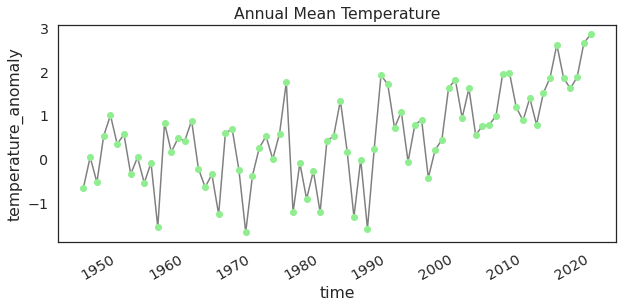

In [ ]:
# Select a single longitude, latitude
lon, lat = 27.6, 53.9

# Slice the data spatially using a single lat/lon point
temp_in_one_pount = ds_annual.sel(longitude=lon, latitude=lat, method='nearest')
# temp_in_one_pount = ds_annual.sel(latitude=slice(75,90))
# temp_in_one_pount = temp_in_one_pount.groupby('time').mean(['longitude','latitude'])

# Plot the data
f, ax = plt.subplots(figsize=(10, 4))
# Use xarray to create a quick time series plot
temp_in_one_pount.plot(marker="o",
                        color="grey",
                        markerfacecolor="lightgreen",
                        markeredgecolor="lightgreen")
ax.set(title="Annual Mean Temperature")
plt.show()

In [ ]:
# Convert to a dataframe
temp_in_one_pount_df = temp_in_one_pount.to_dataframe().reset_index()
temp_in_one_pount_df

,time,latitude,longitude,temperature_anomaly
0,1945-01-01,52.5,27.5,-0.668989
1,1946-01-01,52.5,27.5,0.038916
2,1947-01-01,52.5,27.5,-0.542403
3,1948-01-01,52.5,27.5,0.522709
4,1949-01-01,52.5,27.5,1.001200
...,...,...,...,...
71,2016-01-01,52.5,27.5,1.851518
72,2017-01-01,52.5,27.5,1.616005
73,2018-01-01,52.5,27.5,1.875174
74,2019-01-01,52.5,27.5,2.660291


In [ ]:
from kats.consts import TimeSeriesData
tsd = TimeSeriesData(temp_in_one_pount_df[['time','temperature_anomaly']])

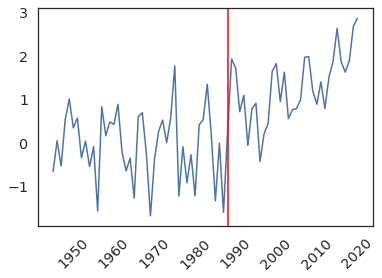

TimeSeriesChangePoint(start_time: 1988-01-01 00:00:00, end_time: 1988-01-01 00:00:00, confidence: 0.9999999993523395)

In [ ]:
from kats.detectors.cusum_detection import CUSUMDetector
detector = CUSUMDetector(tsd)
change_points = detector.detector(change_directions=["increase"])

plt.xticks(rotation=45)
detector.plot(change_points)
plt.show()
change_points[0][0]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



(TimeSeriesChangePoint(start_time: 1993-01-01 00:00:00, end_time: 1993-01-01 00:00:00, confidence: 0.9623330777713712),
 <kats.detectors.trend_mk.MKMetadata at 0x7f195ccd2b90>)

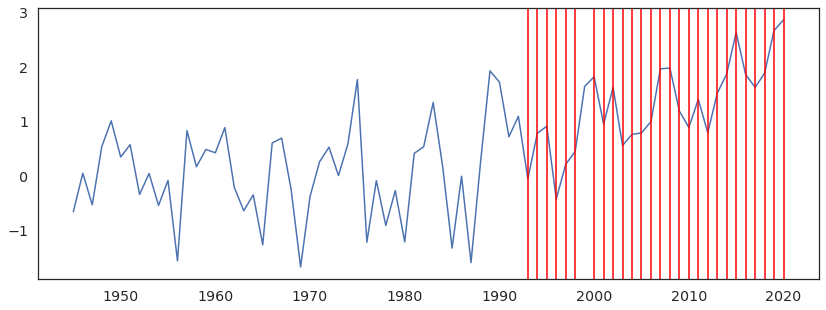

In [ ]:
#!pip install kats
from kats.detectors.trend_mk import MKDetector
detector = MKDetector(data=tsd, threshold=.1, alpha = 0.05)
# run detector
detected_time_points = detector.detector(direction='up', window_size=15)
# plot the results
detector.plot(detected_time_points)
detected_time_points[0]

In [ ]:
time = temp_in_one_pount.coords['time'].values

def trend_change_point(data):  
  #data = temp_in_one_pount.data
  #time = temp_in_one_pount.coords['time'].values
  if np.count_nonzero(np.isnan(data)) > 0.25 * data.size:
    return None  
  df = pd.DataFrame(data={'time':time, 'value':data})
  tsd = TimeSeriesData(df)

  # detector = CUSUMDetector(tsd)
  # change_points = detector.detector(change_directions=["increase"])

  detector = MKDetector(data=tsd, threshold=.1, alpha = 0.05)
  change_points = detector.detector(direction='up', window_size=15)
  return None if not change_points else xr.DataArray(change_points[0][0].start_time.year)


In [ ]:
ds_annual_dask = ds_annual.chunk({'latitude':10, 'longitude':10})
ds_annual_dask

<xarray.DataArray 'temperature_anomaly' (time: 76, latitude: 36, longitude: 72)>
dask.array<xarray-<this-array>, shape=(76, 36, 72), dtype=float32, chunksize=(76, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1945-01-01 1946-01-01 ... 2020-01-01
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5

In [ ]:
change_point_dask = xr.apply_ufunc(trend_change_point,
                                   ds_annual_dask,
                                   vectorize=True,
                                   dask='parallelized',
                                   input_core_dims=[['time']], # reduce along 'time'
                                   output_dtypes=['d'],
                                   )

In [ ]:
%%time
change_point_computed = change_point_dask.compute()
change_point_computed

CPU times: user 11.2 s, sys: 1.04 s, total: 12.2 s
Wall time: 10.7 s


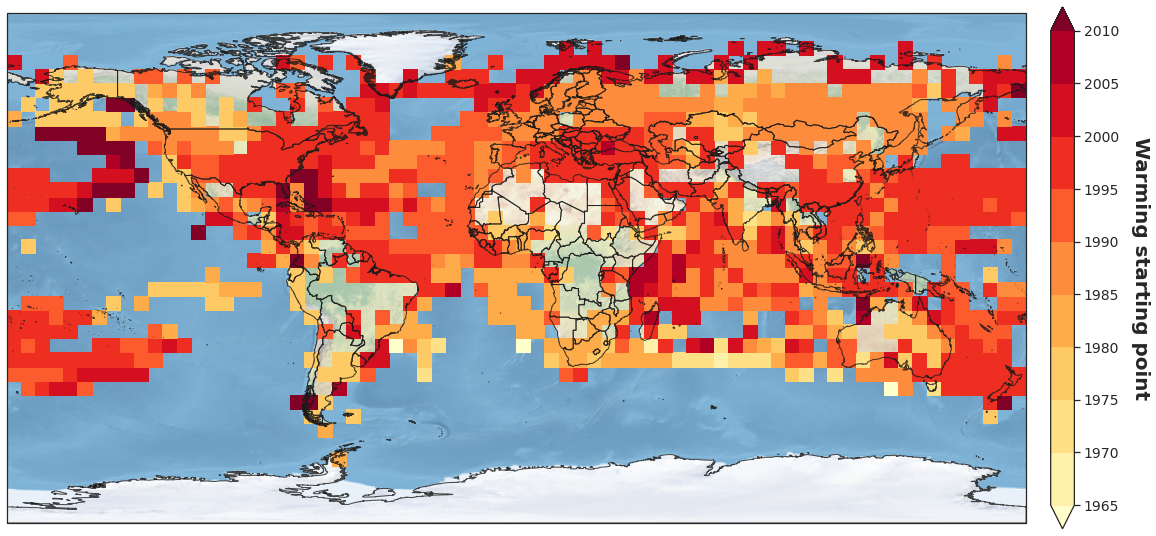

In [ ]:
plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
# Put a background image on for nice sea rendering.
ax.stock_img()
img = change_point_computed.plot(ax = ax, levels=[y for y in range(1965, 2011, 5)],                                
                                cmap='YlOrRd',
                                add_colorbar = False)
cb = plt.colorbar(img, orientation = 'vertical', pad = 0.02, shrink = 0.8)
cb.set_label(label = 'Warming starting point', size = 20, weight = 'bold', rotation = -90, labelpad = 30)
cb.ax.tick_params(labelsize=14)
boundaries.plot(ax = ax, alpha = 0.8, facecolor = 'none', edgecolor = 'k')
plt.show()

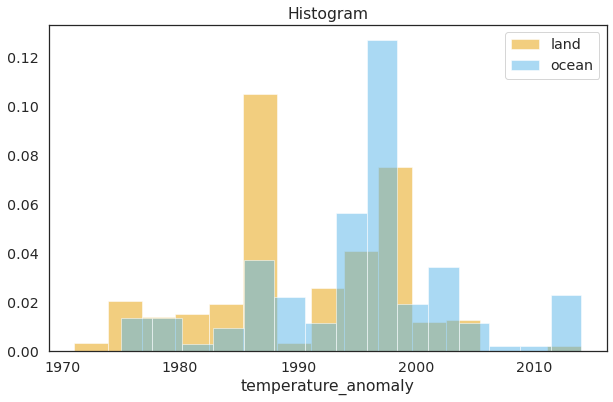

In [ ]:
stacked = change_point_computed.stack(allpoints=['latitude','longitude'])
lon = stacked.coords['longitude'].values
lat = stacked.coords['latitude'].values
is_on_land = globe.is_land(lat, lon)
change_point_land = stacked.where((is_on_land) & (lat > 0)).unstack('allpoints')
change_point_ocean = stacked.where(~is_on_land & (lat > 0)).unstack('allpoints')

plt.figure(figsize=(10, 6))
ax = plt.axes()
change_point_land.plot.hist(ax = ax, bins = 15, density=True, color = '#E69F00', alpha = 0.5, label='land')
change_point_ocean.plot.hist(ax = ax, bins = 15, density=True, color = '#56B4E9', alpha = 0.5, label='ocean')
ax.legend()

In [ ]:
stacked = change_point_computed.stack(allpoints=['latitude','longitude'])
stacked

<xarray.DataArray 'temperature_anomaly' (allpoints: 2592)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * allpoints  (allpoints) MultiIndex
  - latitude   (allpoints) float64 -87.5 -87.5 -87.5 -87.5 ... 87.5 87.5 87.5
  - longitude  (allpoints) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5